# MNIST with Pytorch

## Load Library

In [73]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from tqdm.notebook import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

np.random.seed(0)
torch.manual_seed(0)

In [74]:
import math
import matplotlib.pyplot as plt

def plot_images(images, labels, columns=5, image_size=None, figsize=(8, 8), cmap='gray'):
    fig = plt.figure(figsize=figsize)
    fig.tight_layout(h_pad=3)
    rows = math.ceil(len(images)/columns)
    for image, label, position in zip(images, labels, range(1, len(labels)+1)):
        fig.add_subplot(rows, columns, position)
        if image_size is not None:
            image = image.reshape(image_size)
        
        plt.imshow(image, cmap=cmap, interpolation='nearest')
        plt.axis('off')
        plt.title(label)
    plt.show()

## Configuration

In [75]:
CONFIG = {
    'DEVICE': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'DATA_FOLDER_PATH': '../downloads/MNIST/'
}

## Load Data

In [76]:
my_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [77]:
trainset = MNIST(root=CONFIG['DATA_FOLDER_PATH'], train=True, download=True, transform=my_transforms)
testset = MNIST(root=CONFIG['DATA_FOLDER_PATH'], train=False, download=True, transform=my_transforms)

In [78]:
trainloader = DataLoader(trainset, batch_size=2048, shuffle=True)
testloader = DataLoader(testset, batch_size=2048, shuffle=False)

## Visualize Data

### Train Data

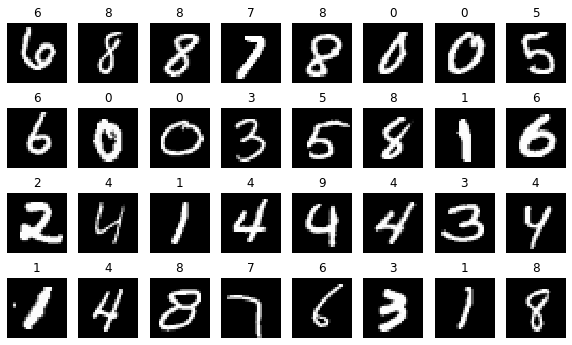

In [79]:
for images, labels in trainloader:
    plot_images(images[:32].permute(0, 2, 3, 1).view(-1, 28, 28), labels.numpy(), columns=8, figsize=(10, 6))
    break

### Test Data

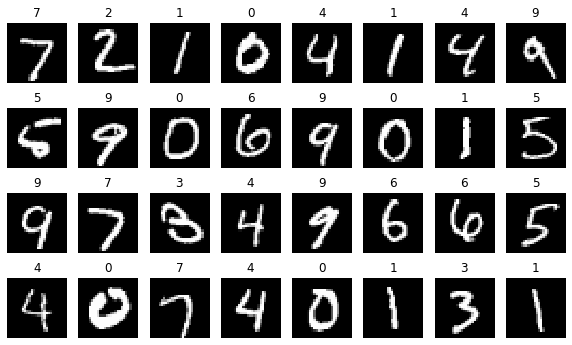

In [80]:
for images, labels in testloader:
    plot_images(images[:32].permute(0, 2, 3, 1).view(-1, 28, 28), labels.numpy(), columns=8, figsize=(10, 6))
    break

## Model Class

In [81]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, output_size),
            nn.Softmax(1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)

## Util Methods

In [82]:
def fit(trainloader, testloader, model, criterion, optimizer, epochs=1):    
    train_loss = []
    for epoch in tqdm(range(epochs), total=epochs, unit='epoch', desc='Epoch', position=0):
        losses = []
        for images, labels in tqdm(trainloader, unit='batch', desc='Batch', position=1, leave=False):
            images = images.to(CONFIG['DEVICE'])
            labels = labels.to(CONFIG['DEVICE'])
            # Forward Pass
            output = model(images)
            loss = criterion(output, labels)

            # Backward Pass
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()
            
            with torch.no_grad():
                train_loss.append(loss.data.item())
    plt.plot(train_loss)
    plt.show()
            
    with torch.no_grad():
        losses = []
        correct = 0
        for images, labels in trainloader:
            images, labels = images.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
            output = model(images)
            loss = criterion(output, labels)
            losses.append(loss.data.item())
            _, labels_pred = torch.max(output, 1)
            correct += (labels_pred == labels).sum().item()
        print(f'Final Train Loss: {sum(losses)/len(losses)}')
        print(f'Final Train Accuracy: {round(correct/len(trainloader.dataset)*100, 3)}%')

        losses = []
        correct = 0
        for images, labels in testloader:
            images, labels = images.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
            output = model(images)
            loss = criterion(output, labels)
            losses.append(loss.data.item())
            _, labels_pred = torch.max(output, 1)
            correct += (labels_pred == labels).sum().item()
        print(f'Final Test Loss: {sum(losses)/len(losses)}')
        print(f'Final Test Accuracy: {round(correct/len(testloader.dataset)*100, 3)}%')

## Train Model

In [83]:
print(CONFIG["DEVICE"])

cuda


Epoch:   0%|          | 0/60 [00:00<?, ?epoch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

Batch:   0%|          | 0/30 [00:00<?, ?batch/s]

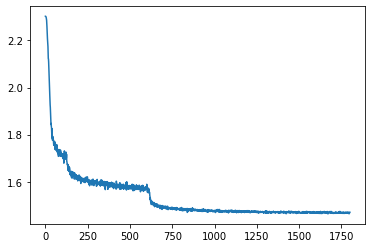

Final Train Loss: 1.4678817987442017
Final Train Accuracy: 99.353%
Final Test Loss: 1.4846245288848876
Final Test Accuracy: 97.62%


In [84]:
model = Model(784, 10).to(CONFIG['DEVICE'])
criterion = nn.CrossEntropyLoss()
epochs = 60
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

fit(trainloader, testloader, model, criterion, optimizer, epochs)